In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the paths
image_folder = r'C:\Users\hari\Desktop\myntradataset\datasets'
output_folder = r'C:\Users\hari\Desktop\preprocessed'

# Check if the input directory exists
if not os.path.exists(image_folder):
    print(f"The directory {image_folder} does not exist.")
    exit(1)
else:
    print(f"The directory {image_folder} was loaded successfully.")

The directory C:\Users\hari\Desktop\myntradataset\datasets was loaded successfully.


In [4]:
# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the preprocessing function
def preprocess_image(image_path, output_size=(128, 128)):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(output_size)  # Resize the image
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    return image

In [5]:

# Initialize list for storing filenames of processed images
processed_image_filenames = []

In [6]:
# Process images
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    if os.path.isfile(image_path):
        processed_image = preprocess_image(image_path)
        
        # Save the processed image
        output_image_path = os.path.join(output_folder, image_name)
        processed_image_pil = Image.fromarray((processed_image * 255).astype(np.uint8))
        processed_image_pil.save(output_image_path)
        
        # Keep track of processed image filenames for later visualization
        processed_image_filenames.append(output_image_path)

In [7]:
# Visualize some processed images
def visualize_images(image_filenames, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(image_filenames))):
        image = Image.open(image_filenames[i])
        plt.subplot(1, num_images, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

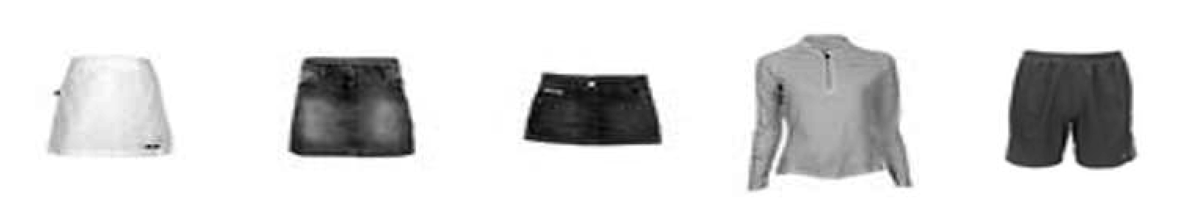

In [8]:
# Show the first 5 processed images
visualize_images(processed_image_filenames, num_images=5)

In [9]:

print("Image preprocessing completed successfully.")
print(f"Processed images are saved in {output_folder}")

Image preprocessing completed successfully.
Processed images are saved in C:\Users\hari\Desktop\preprocessed
